# W3_Assessing Performance

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# get polynomial dataframe
def get_polynomial_df(feature, degree):
    df = pd.DataFrame()
    df['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            df[name] = feature ** power
    return df

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
data = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
data.sort_values(by=['sqft_living', 'price'], inplace=True)
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
21332,9266700190,20150511T000000,245000.0,1.0,1.00,390.0,2000,1,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340.0,5100.0
8623,6303400395,20150130T000000,325000.0,1.0,0.75,410.0,8636,1,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190.0,8636.0
11500,4322200105,20150331T000000,229050.0,1.0,1.00,420.0,3298,1,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460.0,4975.0
14466,7549801385,20140612T000000,280000.0,1.0,0.75,420.0,6720,1,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420.0,6720.0
465,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0


In [4]:
poly1 = get_polynomial_df(data['sqft_living'], 1)
poly1['price'] = data['price']
poly1.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


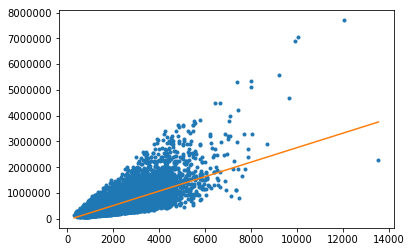

In [5]:
# polynomial power = 1
model1 = LinearRegression().fit(poly1['power_1'].reshape(-1,1), poly1['price'])
plt.plot(poly1['power_1'], poly1['price'], '.')
plt.plot(poly1['power_1'], model1.predict(poly1['power_1'].reshape(-1,1)))

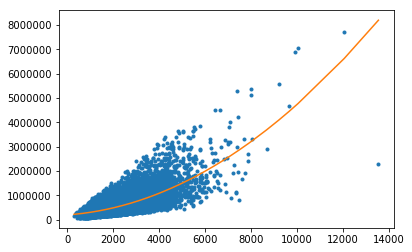

In [6]:
# polynomial power = 2
poly2 = get_polynomial_df(data['sqft_living'], 2)
poly2['price'] = data['price']

model2 = LinearRegression().fit(poly2[['power_1', 'power_2']], poly2['price'])
plt.plot(poly2['power_1'], poly2['price'], '.')
plt.plot(poly2['power_1'], model2.predict(poly2[['power_1', 'power_2']]))

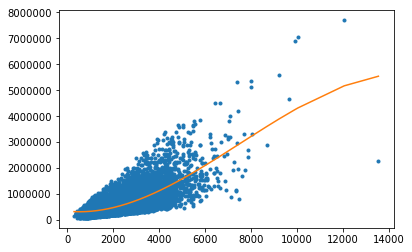

In [7]:
# polynomial power = 3
poly3 = get_polynomial_df(data['sqft_living'], 3)
poly3['price'] = data['price']

model3 = LinearRegression().fit(poly3[['power_1', 'power_2', 'power_3']], poly3['price'])
plt.plot(poly3['power_1'], poly3['price'], '.')
plt.plot(poly3['power_1'], model3.predict(poly3[['power_1', 'power_2', 'power_3']]))

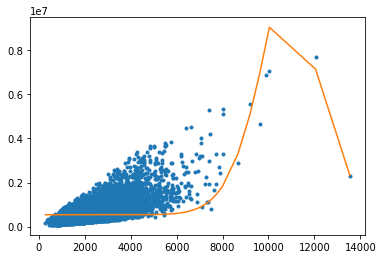

In [8]:
# polynomial power = 15
poly15 = get_polynomial_df(data['sqft_living'], 15)

model15 = LinearRegression().fit(poly15, data['price'])
plt.plot(poly15['power_1'], data['price'], '.')
plt.plot(poly15['power_1'], model15.predict(poly15))

The coefficient of power_15 for dataset 1 is -3.7470027081099033e-16
The coefficient of power_15 for dataset 2 is 1.339206523454095e-15
The coefficient of power_15 for dataset 3 is -2.498001805406602e-16
The coefficient of power_15 for dataset 4 is -3.2959746043559335e-16


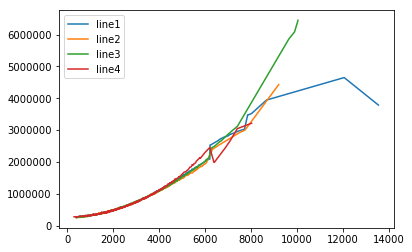

In [9]:
# use 4 different data sets to build 4 models
subset1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
subset2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
subset3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
subset4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

i = 1

for dataset in (subset1, subset2, subset3, subset4):
    poly15 = get_polynomial_df(dataset['sqft_living'], 15)
    poly15['price'] = dataset['price']
    
    model15 = LinearRegression().fit(poly15.drop('price', axis=1), poly15['price'])
    print('The coefficient of power_15 for dataset {} is {}'.format(i, model15.coef_[14]))
    
    plt.plot(poly15['power_1'], model15.predict(poly15.drop('price', axis=1)), label='line'+str(i))
    plt.legend()
    
    i += 1

In [10]:
def get_RSS(X, model, y):
    predictions = model.predict(X)
    return sum((predictions - y) ** 2)

In [11]:
train_add_val, test_data = train_test_split(data, train_size=0.9, random_state=1)
train_data, val_data = train_test_split(train_add_val, train_size=0.5, random_state=1)

In [12]:
# train_data = pd.read_csv('wk3_kc_house_train_data.csv')
# val_data = pd.read_csv('wk3_kc_house_valid_data.csv')
# test_data = pd.read_csv('wk3_kc_house_test_data.csv')

min_RSS = float("inf")
index = 0
best_model = None

# use different power and find optimal model
for power in range(1,16):
    poly = get_polynomial_df(train_data['sqft_living'], power)
    poly['price'] = train_data['price']
    model = LinearRegression().fit(poly.drop('price', axis=1), poly['price'])

    X = get_polynomial_df(val_data['sqft_living'], power)
    y = val_data['price']
    RSS = get_RSS(X, model, y)

    if RSS < min_RSS:
        min_RSS = RSS
        index = power
        best_model = model 
    
    print('The RSS on validation dataset when polynomial power = {}: {}'.format(power, RSS))

print('When power is {}, it has minimum RSS {}.'.format(index, min_RSS))

The RSS on validation dataset when polynomial power = 1: 688774305233989.5
The RSS on validation dataset when polynomial power = 2: 623408727198380.8
The RSS on validation dataset when polynomial power = 3: 626184335265108.8
The RSS on validation dataset when polynomial power = 4: 619269329315262.6
The RSS on validation dataset when polynomial power = 5: 612251017961104.4
The RSS on validation dataset when polynomial power = 6: 604020353088751.9
The RSS on validation dataset when polynomial power = 7: 663228906990762.9
The RSS on validation dataset when polynomial power = 8: 1033161235162006.2
The RSS on validation dataset when polynomial power = 9: 2320326855987908.0
The RSS on validation dataset when polynomial power = 10: 6004434077086864.0
The RSS on validation dataset when polynomial power = 11: 1.535226700467828e+16
The RSS on validation dataset when polynomial power = 12: 3994362072871782.0
The RSS on validation dataset when polynomial power = 13: 6988094132542063.0
The RSS on v

In [13]:
# compute test error 
X = get_polynomial_df(test_data['sqft_living'], index)
y = test_data['price']
get_RSS(X, best_model, y)

143374909106587.44